In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./dataKaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./dataKaggle\label_int_to_str_mapping.csv
./dataKaggle\sample_submission.csv
./dataKaggle\train_labels.csv
./dataKaggle\test_images.npy\test_images.npy
./dataKaggle\train_images.npy\train_images.npy


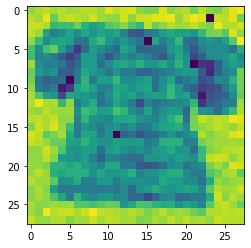

In [4]:
train_images = np.load("./dataKaggle/train_images.npy")
# To visualize an image you can use the following code block:

import matplotlib.pyplot as plt

def show_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    plt.show()

show_image(train_images[0]) # 0 is the index of the training image you want to display

In [5]:
#importing supplimentary libraries
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt

In [7]:
X_train = np.load("./dataKaggle/train_images.npy")/255.0
y_train = np.array(pd.read_csv("./dataKaggle/train_labels.csv")).transpose()[1]
X_test = np.load("./dataKaggle/test_images.npy")/255.0
classes = np.array(["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"])

In [8]:
y_train

array([6, 4, 6, ..., 7, 3, 2], dtype=int64)

In [144]:
CNN = models.Sequential([
    
    layers.Flatten(input_shape = (28, 28)),
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.2),
    BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dense(units = 10, activation = 'softmax')
])

CNN.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
history = CNN.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 13s 7ms/step - loss: 0.9067 - accuracy: 0.6650
Epoch 2/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8599 - accuracy: 0.6848
Epoch 3/5
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8325 - accuracy: 0.6958
Epoch 4/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7865 - accuracy: 0.7161
Epoch 5/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7509 - accuracy: 0.7262


In [153]:
y_pred = CNN.predict(X_test)
prediction = np.array([])
for i in range(len(y_pred)):
    prediction = np.append(prediction,np.argmax(y_pred[i]))
    
print(prediction)
# F yeah this thing works


625/625 [==============================] - 2s 3ms/step
(20000, 10)
[9. 5. 2. ... 3. 8. 6.]


In [9]:
x_test = np.load('./dataKaggle/test_images.npy')
x_test = x_test.reshape(len(x_test),1,28,28)
y_pred = CNN.predict(X_test)
prediction = np.array([])
for i in range(len(y_pred)):
    prediction = np.append(prediction,np.argmax(y_pred[i]))

df_test = pd.read_csv('./dataKaggle/sample_submission.csv')
df_test['label'] = prediction
df_test.to_csv('./dataKagglesample_submission.csv', index=False)

NameError: name 'CNN' is not defined